# Import Libraries

In [2]:
# import libraries
import pandas as pd
import seaborn as sns

# Download, Load & Explore Dataset from Kaggle

In [15]:
# dataset name: Breast Cancer Wisconsin (Diagnostic) Data Set
# download dataset
# link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/code?resource=download
# load data on dataframe
bcd = pd.read_csv('Breast Cancer Data.csv')
# display dataframe
bcd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
# (diagnosis): M=Malignant/Harmful, B=Benign?Not-Harmful
# the data is divided into 3 parts. the first part is mean, the second part is standard error (_se); 
# and the third parameter is worst (_worst).
# each part contains three parameters each. in the end there is a unnamed column which contains null values and should be;
# removed.

In [17]:
# count of rows and columns
bcd.shape

(569, 33)

In [20]:
# count number of null(empty) values
# counting total number of null values for every column in our database.
# isna() used to detect the missing values in pandas.
# sum() used to detect the total number of null values present in the dataset.
bcd.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [21]:
# Drop the column with null values
# as we want to drop a column, so 1 and axis refers to rows. setting inplace as True will update the data frame bcd and;
# now the data frame will be free from the column containing the null values.
bcd.dropna(axis=1, inplace=True)

In [23]:
# count of rows and columns
bcd.shape

(569, 32)

In [24]:
# Get count of number of M or B cells in diagnosis
bcd['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Label Encoding

In [26]:
# machine learning deals with datasets which contains multiple labels in one or more than one coloumns. these labels can be;
# in the form of words or numbers. so to make the data more understandable and readable for human, the training data is often;
# labelled into words.
# label encoding refers to converting these labels into numeric from  so as to convert it into the machine readable form.
# it is an important pre-processing step for the structured dataset in supervised learning.
# Get Datatypes of each column in our dataset
bcd.dtypes
# id = integer type; we can get rid of this column.
# diagnosis = object type; it has string values. the values M/B needs to be transformed into numerical values.
# Malignant = 1, Benign = 0
# others = float type.

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [28]:
# Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit_transform(bcd.iloc[:,1].values)
# diagnosis is present in column number 1, id is in number 0. the entire rows is provided, so ':' is applied.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [29]:
# now put the data back into the bcd dataframe.
bcd.iloc[:,1]=labelencoder.fit_transform(bcd.iloc[:,1].values)

In [30]:
# display dataframe
bcd

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Split Dataset & Feature Scaling

In [32]:
# Splitting the dataset into independent and dependent datasets
# dependent = diagnosis column, independent = rest of the columns.
X=bcd.iloc[:,2:].values
Y=bcd.iloc[:,1].values
# Y will tell us if the patient has cancer or not. X is going to tell us the features or attributes.

In [34]:
# Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [36]:
# Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
#print data
X_train

array([[ 0.6014406 ,  0.34436702,  0.60633527, ...,  0.65530518,
         0.30411601, -0.12085337],
       [-0.67694552, -1.08313129, -0.6447511 , ..., -0.15359715,
        -0.52236259,  0.80581825],
       [ 0.44058407,  0.24951663,  0.37321359, ...,  0.59083858,
         0.8573101 ,  0.11702362],
       ...,
       [ 0.25432914, -0.59702306,  0.27219419, ..., -0.21192407,
        -1.22958977,  0.07176628],
       [-0.3072577 , -1.28468836, -0.38300044, ..., -1.23233825,
        -1.34552865, -1.01496178],
       [-0.7390305 , -0.12039987, -0.76621977, ..., -0.80501679,
         0.64033876, -0.76328682]])

# Build a Logistic Regression Model

In [40]:
# build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [41]:
# make use of trained model to make predictions on test data
predictions = classifier.predict(X_test)

# Performance Evaluation

In [42]:
# TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative

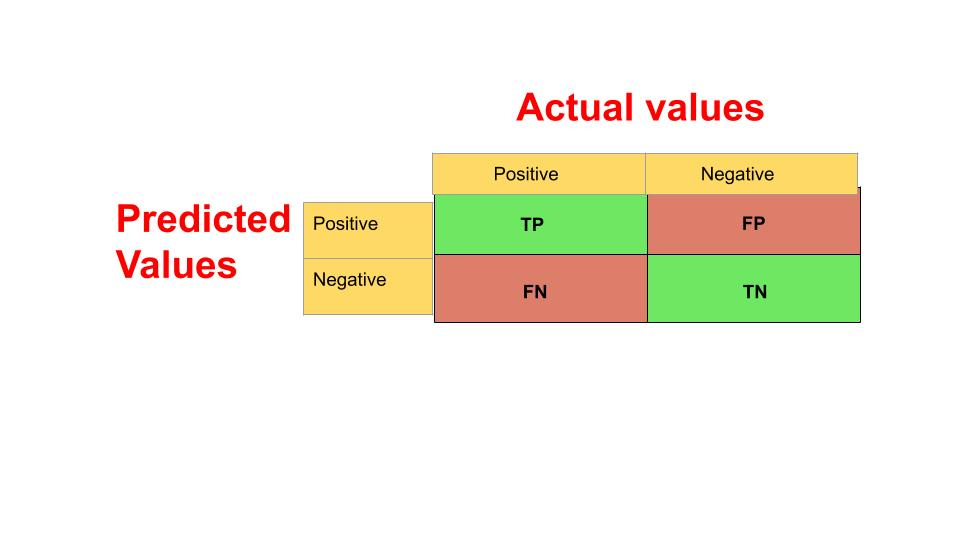

[[92  2]
 [ 3 46]]


<AxesSubplot:>

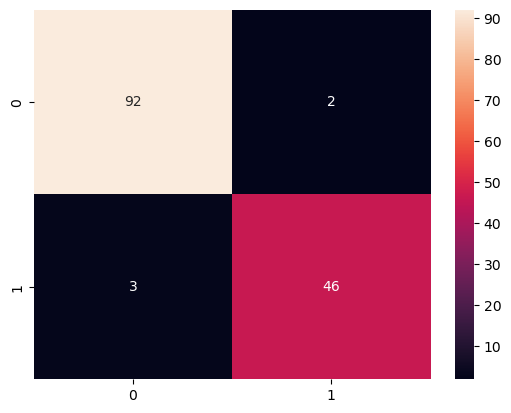

In [50]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test,predictions)
print(cm)
sns.heatmap(cm,annot=True)

In [52]:
# the model has done a good job as the TP and TN values are good. TP = 92, TN = 46
# On the axis, 0 indicates beningn and 1 represents malignant.

In [53]:
# get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.965034965034965


In [56]:
# model is 96% accurate on the testing data.
# (additional):compare the actual values present in the data frame with the predicted values by the model.
print(Y_test)
# Y_test is the actual values

[0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0
 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1]


In [55]:
print(predictions)

[0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1]


In [59]:
# it is time consuming to go through each and every values and compare them, so this is why the model accuracy is calculated;
# in [53]